<a href="https://colab.research.google.com/github/cu-applied-math/stem-camp-notebooks/blob/master/notebooks/Python_Intro_Game_Notebooks/PigGame_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pig Game: solutions

This builds on the Guess-a-number game

This version of the game has some potential solutions (Stephen, July 2020), and is only for the Master branch of github

Activities:

To start with, read about the game of PIG at [wikipedia](https://en.wikipedia.org/wiki/Pig_(dice_game)).  The game has two players take turns playing rounds until one player reaches a score of 100. For now, let's start by examining what happens at a single round. At a round, the player rolls the dice and gets a 1, 2, 3, 4, 5 or 6. If they get a 1, their turn is over; otherwise, they get the score of the dice. Then they can choose to "hit" (and roll again), or "stay" (and end their turn).  If they hit and get a 1, they lose all the points they've earned in that round. If they stay, then they keep all the points, but can't earn any more points as their round is over.

1. Write a python script that lets a user play a single round of the game.  Ask the user for input using the `input` function of Python.
2. Suppose the user has a simple strategy of always hitting until their score (at the current round) goes over some threshold. Program this strategy, and then have this strategy play a round of the games. In fact, you can play thousands of rounds.
3. For that simple strategy, what is the best threshold to choose?  You can figure this out via simulation or via math.
4. Make a game framework that pits two strategies against each other
5. Make some strategies and have them compete, or compete with another student's strategies
6. If one strategy beats another strategy in, say, 505 games out of 1000 total games, can you be sure it's a better strategy, or is this due to chance?  Can you conclude if you have a really good strategy?



In [13]:
# Simulate the PIG game
# e.g., I make a one round game, then make a 2 round game
# Useful tools
# Method #1
import random  
# Method #2
from numpy.random import default_rng  #  see https://numpy.org/doc/stable/reference/random/index.html
rng = default_rng()
# Not recommended: from numpy import random

In [8]:
# Two ways to do it
random.randint(1,6)

4

In [32]:
rng.integers(1,7) # Note we use 7 not 6

3

In [41]:
# Let's play a game
your_score = 0
hold  = False
while hold == False:
  
  # Now, roll the dice
  dice = random.randint(1,6)
  if dice == 1:
    print("You rolled a 1 and lost everything!")
    print("Turn over, score is 0")
    your_score = 0
    hold = True
  else:
    your_score += dice
    print("You rolled a", dice, " and score is", your_score)
    move = input("Continue playing (c), or hold (h)?").lower()
    hold = False if move == 'c' else True


You rolled a 2  and score is 2
Continue playing (c), or hold (h)?c
You rolled a 3  and score is 5
Continue playing (c), or hold (h)?c
You rolled a 6  and score is 11
Continue playing (c), or hold (h)?c
You rolled a 1 and lost everything!
Turn over, score is 0


In [15]:
def playGame( threshold ):
  """ Keep playing until score > threshold """
  score = 0
  while score <= threshold:
    dice = random.randint(1,6)
    if dice == 1:
      score = 0
      break
    else:
      score = score + dice
  return score

In [60]:
# Now, let's pick a simple strategy: keep playing until your score hits a threshold
# Then, simulate many rounds of the game.  Find the best strategy
threshold = 5
for threshold in range(1,25):
  score = 0
  numberOfGames = int(1e5)
  for game in range(numberOfGames):
    score = score + playGame( threshold )
  print('Using a threshold of', threshold, ', your average score was', score/numberOfGames)

Using a threshold of 1 , your average score was 3.34197
Using a threshold of 2 , your average score was 3.83468
Using a threshold of 3 , your average score was 4.29804
Using a threshold of 4 , your average score was 4.84093
Using a threshold of 5 , your average score was 5.38701
Using a threshold of 6 , your average score was 5.97676
Using a threshold of 7 , your average score was 6.24003
Using a threshold of 8 , your average score was 6.57406
Using a threshold of 9 , your average score was 6.85939
Using a threshold of 10 , your average score was 7.14064
Using a threshold of 11 , your average score was 7.38608
Using a threshold of 12 , your average score was 7.60428
Using a threshold of 13 , your average score was 7.7006
Using a threshold of 14 , your average score was 7.84318
Using a threshold of 15 , your average score was 7.94069
Using a threshold of 16 , your average score was 8.03231
Using a threshold of 17 , your average score was 8.09751
Using a threshold of 18 , your average sc

In [47]:
# Let's compute things exactly using probability

In [16]:
# Now, let's allow for more complicated strategies, for 2 players playing against each other up to a score of 100

def playRound( player, playersExistingScore, opponentsExistingScore, roundsSoFar):
  score = 0
  rollsSoFar = 0
  while True:
    # Ask the algorithm what to do
    hit_or_hold = player( score, playersExistingScore, opponentsExistingScore, rollsSoFar, roundsSoFar )
    if hit_or_hold == 0:  # This means hold
      break
    else:
      dice = random.randint(1,6)
      if dice == 0:
        score = 0
        break
      else:
        score += dice
    rollsSoFar += 1
  return score

def twoPlayerGame( playerA, playerB, numberOfGames = 100, winningThreshold = 100):
  numberOfGames = int( numberOfGames )
  winsA = 0
  winsB = 0
  for game in range(numberOfGames):
    scoreA = 0
    scoreB = 0
    roundsSoFar = 0
    while True:
      # Who plays first? Let's alternate
      if (game%2)==0: # game is an even number
        scoreA += playRound( playerA, scoreA, scoreB, roundsSoFar)
        if scoreA >= winningThreshold:
          winsA += 1
          break
        scoreB += playRound( playerB, scoreB, scoreA, roundsSoFar)
        if scoreB >= winningThreshold:
          winsB += 1
          break
      else:
        scoreB += playRound( playerB, scoreB, scoreA, roundsSoFar)
        if scoreB >= winningThreshold:
          winsB += 1
          break
        scoreA += playRound( playerA, scoreA, scoreB, roundsSoFar)
        if scoreA >= winningThreshold:
          winsA += 1
          break
      roundsSoFar += 1
  return [winsA,winsB]

In [17]:
nextMove = {'hold':0, 'hit': 1 }

def simpleAndSillyStrategy(scoreOfCurrentRound, yourExistingScore, opponentsExistingScore,threshold):
  if scoreOfCurrentRound <= threshold:
    return nextMove["hit"]
  else:
    return nextMove["hold"]

def simpleStrategy(scoreOfCurrentRound, yourExistingScore, opponentsExistingScore,threshold):
  if scoreOfCurrentRound + yourExistingScore >= 100:
    return nextMove["hold"]
  elif scoreOfCurrentRound <= threshold:
    return nextMove["hit"]
  else:
    return nextMove["hold"]

def simpleStrategy_withHailMary(scoreOfCurrentRound, yourExistingScore, opponentsExistingScore,threshold):
  if (opponentsExistingScore > 90 ) and (yourExistingScore<50):
    # Things are desperate!  Time for a hail mary pass...
    threshold += 5
  elif opponentsExistingScore > 15 + yourExistingScore:
    threshold += 5  # This one makes a BIG difference
  if yourExistingScore > 15 + opponentsExistingScore:
    # You have a comfortable lead. Don't blow it on a risky move
    threshold -= 0 # 5
  if scoreOfCurrentRound + yourExistingScore >= 100:
    return nextMove["hold"]
  elif scoreOfCurrentRound <= threshold:
    return nextMove["hit"]
  else:
    return nextMove["hold"]

def strategyA(scoreOfCurrentRound, yourExistingScore, opponentsExistingScore, numberOfRollsAtCurrentRound, numberOfRoundsSoFar):
  return simpleStrategy(scoreOfCurrentRound, yourExistingScore, opponentsExistingScore, 21 )

def strategyB(scoreOfCurrentRound, yourExistingScore, opponentsExistingScore, numberOfRollsAtCurrentRound, numberOfRoundsSoFar):
  return simpleStrategy(scoreOfCurrentRound, yourExistingScore, opponentsExistingScore, 20 )

def strategyC(scoreOfCurrentRound, yourExistingScore, opponentsExistingScore, numberOfRollsAtCurrentRound, numberOfRoundsSoFar):
  return simpleAndSillyStrategy(scoreOfCurrentRound, yourExistingScore, opponentsExistingScore, 20 )

def strategyD(scoreOfCurrentRound, yourExistingScore, opponentsExistingScore, numberOfRollsAtCurrentRound, numberOfRoundsSoFar):
  return simpleStrategy_withHailMary(scoreOfCurrentRound, yourExistingScore, opponentsExistingScore, 20 )

def strategyE(scoreOfCurrentRound, yourExistingScore, opponentsExistingScore, numberOfRollsAtCurrentRound, numberOfRoundsSoFar):
  """ Neller and Presser strategy """
  if (yourExistingScore>71) or (opponentsExistingScore>71):
  return simpleStrategy_withHailMary(scoreOfCurrentRound, yourExistingScore, opponentsExistingScore, 20 )

In [18]:
results = twoPlayerGame( strategyD, strategyB, 1e4)
results

[8570, 1430]

In [148]:
# Ok, how many samples do we need to see until we can be convinced that one strategy is really better than another?
from scipy.stats import binom
prob = binom.cdf( min(results) , sum(results) , 0.5)
prob

0.0

For how to algorithmically compute the best strategies, see [Optimal Play of the Dice Game Pig, by Todd W. Neller and Clifton G.M. Presser 2004](https://cupola.gettysburg.edu/cgi/viewcontent.cgi?article=1003&context=csfac)

For practical strategies, see [Practical Play of the Dice Game Pig, by Todd W. Neller and Clifton G.M. Presser 2010](http://cs.gettysburg.edu/~tneller/papers/umap10.pdf)

Depends on your opponent's strategy of course... the above techniques are for playing against an optimal opponent, and suggest rules of thumb like
"If either player’s score is 71 or higher, roll for the goal. Otherwise, hold
at 21 + round((j-i)/8) where j is your opponent's score and i is your score."

Now let's do some math.  Let's only look at a single turn, and not take into account the entire game.  When should you hit and when should you hold?

Let's compute how much you expect to have after your decision, conditioned on how much you have before the decision.  Let $t$ be the turn-total --- that is, how much you have current at your turn.

Let $X$ be the random variable for your turn-total *after* your decision.

Then if you hold, $\mathbb{E}[X|t] = t$.

If you hit, then 
$$\mathbb{E}[X|t] = 0\cdot \frac{1}{6} + (t+1)\frac{1}{6}+ (t+2)\frac{1}{6}+ (t+3)\frac{1}{6}+ (t+4)\frac{1}{6}+ (5+4)\frac{1}{6} = \frac{5t+20}{6}
$$
Then the expected value for hitting is better than for holding when $ \frac{5t+20}{6} > t $. 

Todo: plot this and find at what score $t$ you should hit or hold

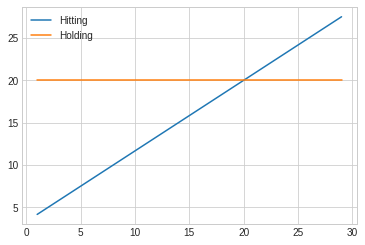

In [9]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

fig = plt.figure()
ax = plt.axes()

t = np.arange(1,30)
x = (5*t+20)/6
ax.plot(t,x,label = 'Hitting')
ax.plot(t,20*np.ones(len(x)),label = 'Holding')
ax.legend()